# program to make nn using tensorflow and keras

In [70]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist                                 # keras inbuilt dataset

(x_train,y_train),(x_test,y_test)=mnist.load_data()             # spliting data into test and train



x_train=tf.keras.utils.normalize(x_train, axis=1)               # normalization
x_test=tf.keras.utils.normalize(x_test, axis=1)


model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())                            # 1 loayer flattens the data

model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))     # layers of Nural network
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.sigmoid))   # final layer (sigmoid or softmax)
                                                                  # sigmoid and softmax for classification
                                                                  # linear for regression


 # compile is essantial function takes 3 parameters    
model.compile(optimizer= "adam",loss="sparse_categorical_crossentropy" ,metrics=["accuracy"])  
 # train data          
model.fit(x_train,y_train,epochs=5)          
          


Epoch 1/5
60000/60000 [==============================] - 11s 180us/step - loss: 0.2400 - acc: 0.9265
Epoch 2/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.0955 - acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0655 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.0497 - acc: 0.9837
Epoch 5/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.0399 - acc: 0.9871


In [48]:
# validate data
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)


10000/10000 [==============================] - 1s 93us/step
0.08020698671471327 0.9781


In [49]:
# predection
predection=model.predict([x_test])

In [50]:
print(predection[0])

[2.7423318e-14 1.0476509e-08 2.8037996e-11 3.0210914e-10 1.5818966e-10
 1.4813833e-12 5.1053716e-18 1.0000000e+00 1.7676647e-13 2.2942923e-09]


In [51]:
# to revert back to imagedata
import numpy as np
print(np.argmax(predection[1]))


2


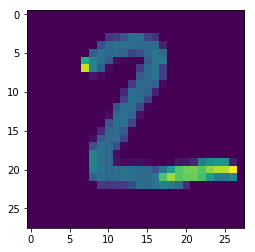

In [42]:
import matplotlib.pyplot as ply
ply.imshow(x_test[1])
ply.show()

# using Gpu


In [ ]:
# runs on GPU
import keras 

config = tf.ConfigProto( device_count = {'GPU':1280 , 'CPU': 1} ) # using gtx 1060
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [71]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5569335296180597238
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4951913267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4349169502045098682
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [65]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [131]:
data=tf.keras.datasets.imdb                                   # can't directly use data which is loaded  from Keras
#data=data.load_data()                                         # way to load data 

In [132]:
len(x_train[0])


218

In [133]:
y_train[0]

1